
<div class="alert alert-info">

**This is a fixed-text formatted version of a Jupyter notebook**

- Try online [![Binder](https://static.mybinder.org/badge.svg)](https://mybinder.org/v2/gh/gammapy/gammapy-webpage/v0.18?urlpath=lab/tree/hess.ipynb)
- You can contribute with your own notebooks in this
[GitHub repository](https://github.com/gammapy/gammapy/tree/master/docs/tutorials).
- **Source files:**
[hess.ipynb](../_static/notebooks/hess.ipynb) |
[hess.py](../_static/notebooks/hess.py)
</div>


# H.E.S.S. data with Gammapy

[H.E.S.S.](https://www.mpi-hd.mpg.de/hfm/HESS/) is an array of gamma-ray telescopes located in Namibia. Gammapy is regularly used and fully supports H.E.S.S. high-level data analysis, after export to the current [open data level 3 format](https://gamma-astro-data-formats.readthedocs.io/).

The H.E.S.S. data is private, and H.E.S.S. analysis is mostly documented and discussed at https://hess-confluence.desy.de/ and in H.E.S.S.-internal communication channels. However, in 2018, a small sub-set of archival H.E.S.S. data was publicly released, called the [H.E.S.S. DL3 DR1](https://www.mpi-hd.mpg.de/hfm/HESS/pages/dl3-dr1/), the data level 3, data release number 1. This dataset is 50 MB in size and is used in many Gammapy analysis tutorials, and can be downloaded via [`gammapy download`](https://docs.gammapy.org/dev/scripts/index.html?highlight=download).

This notebook is a quick introduction to H.E.S.S. data and instrument responses and contains some specifics that are important for H.E.S.S. users:

- IRF formats and shapes
- How to handle safe energy and max offset
- EVENTS and GTI formats (e.g. how HESS 1, 2, configs, ... are handled)
- Link to HESS Confluence where data and help is available (Slack channel)?

Then at the end, link to other analysis tutorials that are likely of interest for H.E.S.S. people, and add a few exercises. This can be short, a 5-10 min read. It's just supposed to be the "landing page" for someone new in H.E.S.S. that has never used Gammapy.

## DL3 DR1

This is how to access data and IRFs from the H.E.S.S. data level 3, data release 1.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
from gammapy.data import DataStore
from gammapy.maps import MapAxis
from gammapy.makers.utils import make_theta_squared_table
from gammapy.visualization import plot_theta_squared_table

In [3]:
data_store = DataStore.from_dir("$GAMMAPY_DATA/hess-dl3-dr1")

In [4]:
data_store.info()

Data store:
HDU index table:
BASE_DIR: /Users/adonath/github/gammapy/gammapy-data/hess-dl3-dr1
Rows: 630
OBS_ID: 20136 -- 47829
HDU_TYPE: ['aeff', 'bkg', 'edisp', 'events', 'gti', 'psf']
HDU_CLASS: ['aeff_2d', 'bkg_3d', 'edisp_2d', 'events', 'gti', 'psf_table']


Observation table:
Observatory name: 'N/A'
Number of observations: 105



In [5]:
data_store.obs_table[:2][["OBS_ID", "DATE-OBS", "RA_PNT", "DEC_PNT", "OBJECT"]]

OBS_ID,DATE-OBS,RA_PNT,DEC_PNT,OBJECT
,,deg,deg,
int64,bytes10,float32,float32,bytes18
20136,2004-03-26,228.6125,-58.771667,MSH15-52
20137,2004-03-26,228.6125,-59.771667,MSH15-52


In [6]:
obs = data_store.obs(23523)

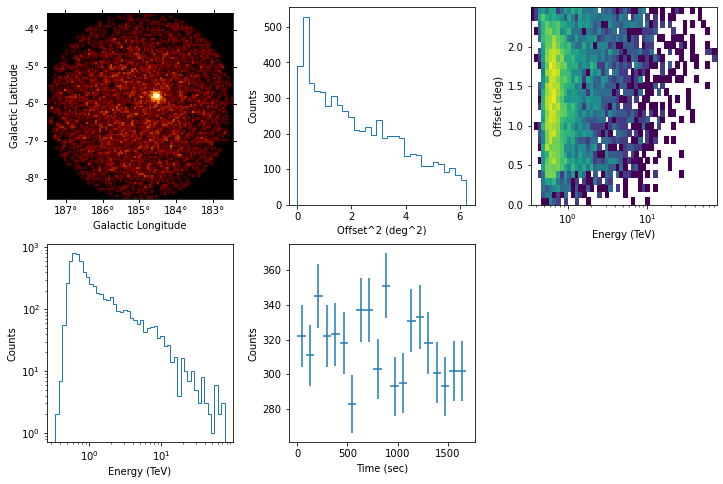

In [7]:
obs.events.select_offset([0, 2.5] * u.deg).peek()

/Users/adonath/software/anaconda3/envs/gammapy-dev/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


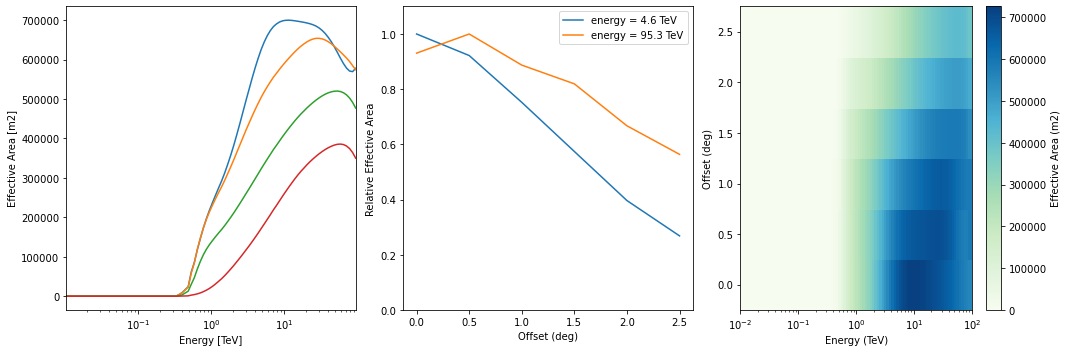

In [8]:
obs.aeff.peek()

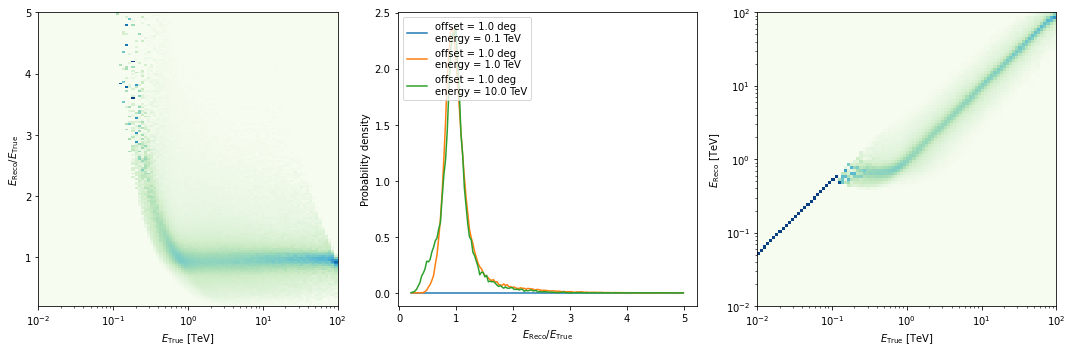

In [9]:
obs.edisp.peek()

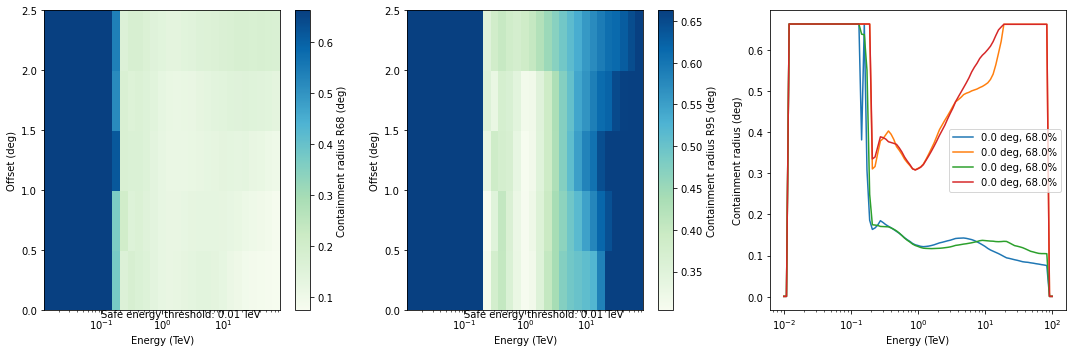

In [10]:
obs.psf.peek()

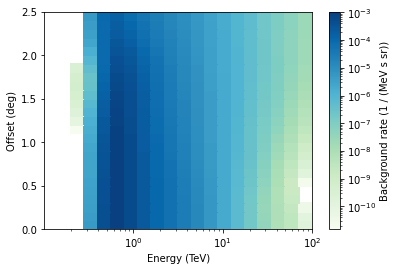

In [11]:
obs.bkg.to_2d().plot()

## Theta squared event distribution
As a quick look plot it can be helpful to plot the quadratic offset (theta squared) distribution of the events. 

In [12]:
position = SkyCoord(ra=83.63, dec=22.01, unit="deg", frame="icrs")
theta2_axis = MapAxis.from_bounds(0, 0.2, nbin=20, interp="lin", unit="deg2")

observations = data_store.get_observations([23523, 23526])
theta2_table = make_theta_squared_table(
    observations=observations,
    position=position,
    theta_squared_axis=theta2_axis,
)

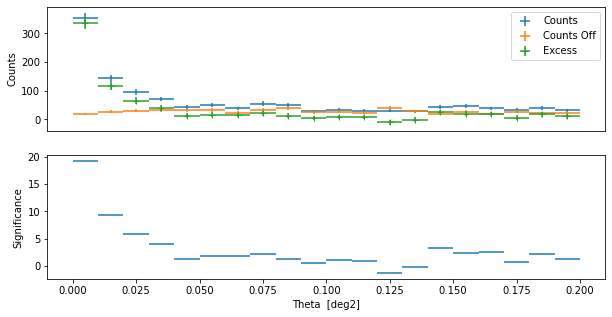

In [13]:
plt.figure(figsize=(10, 5))
plot_theta_squared_table(theta2_table)

## Exercises

- Find the `OBS_ID` for the runs of the Crab nebula
- Compute the expected number of background events in the whole FOV for `OBS_ID=23523` in the 1 TeV to 3 TeV energy band, from the background IRF.

## Next steps

Now you know how to access and work with H.E.S.S. data. All other tutorials and documentation apply to H.E.S.S. and CTA or any other IACT that provides DL3 data and IRFs in the standard format.